### Import Necessary Libraries

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt


## Load Your Data

In [3]:
data = pd.read_csv('/content/sales_data.csv')



## Data Preprocessing

In [4]:
# Convert the date column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Set the date column as the index
data.set_index('Date', inplace=True)

# Check for missing values and handle them
data = data.fillna(method='ffill')


## Exploratory Data Analysis (EDA)

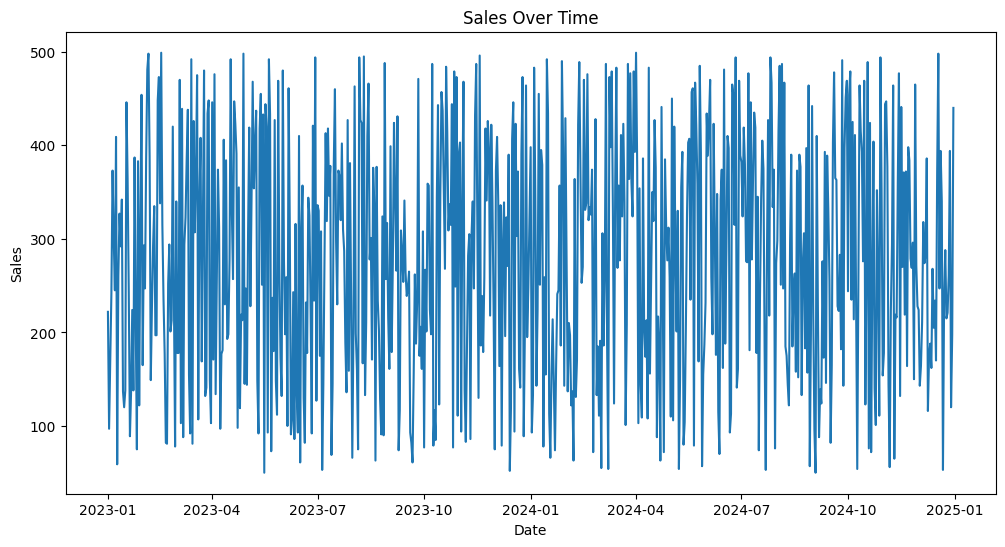

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(data['Sales'])
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


Decompose the Time Series


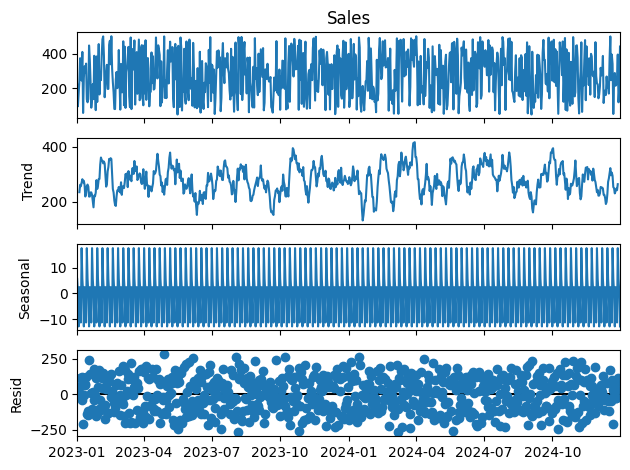

In [6]:
decomposition = sm.tsa.seasonal_decompose(data['Sales'], model='additive')
decomposition.plot()
plt.show()


## Model Selection

Choose an appropriate model for forecasting. Common choices include ARIMA (AutoRegressive Integrated Moving Average) or SARIMA (Seasonal ARIMA).

In [8]:
from statsmodels.tsa.arima.model import ARIMA

# Define the model
model = ARIMA(data['Sales'], order=(1, 1, 1))

# Fit the model
results = model.fit()

# Summary of the model
print(results.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  731
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4589.446
Date:                Mon, 22 Jul 2024   AIC                           9184.891
Time:                        17:14:23   BIC                           9198.670
Sample:                    01-01-2023   HQIC                          9190.207
                         - 12-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0253      0.038     -0.672      0.502      -0.099       0.049
ma.L1         -0.9983      0.007   -136.606      0.000      -1.013      -0.984
sigma2      1.677e+04   1392.336     12.048      0.0

## Forecasting
Use the fitted model to forecast future sales.

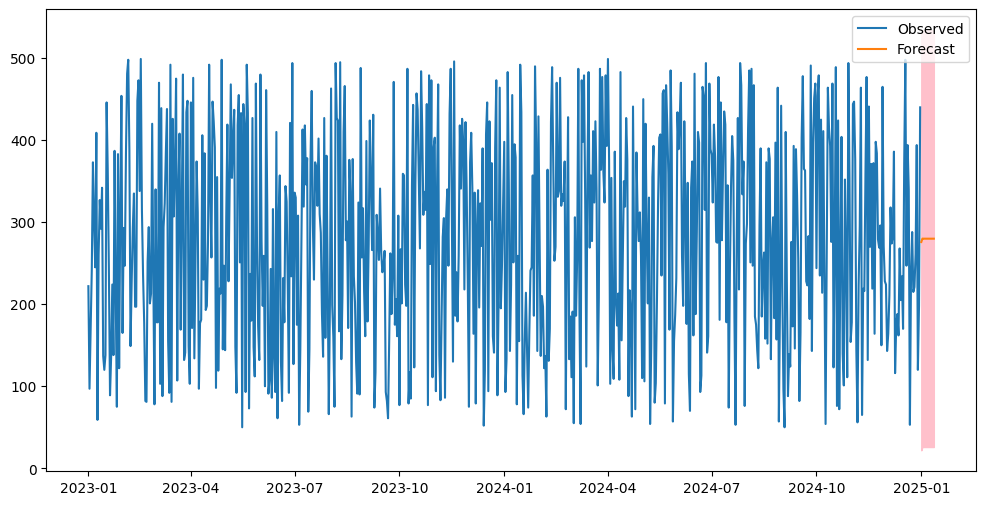

In [9]:
# Forecast for the next 12 periods (e.g., months)
forecast = results.get_forecast(steps=12)

# Get the confidence intervals of the forecast
confidence_intervals = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(data['Sales'], label='Observed')
plt.plot(forecast.predicted_mean, label='Forecast')
plt.fill_between(confidence_intervals.index,
                 confidence_intervals.iloc[:, 0],
                 confidence_intervals.iloc[:, 1], color='pink')
plt.legend()
plt.show()


## Evaluation
Evaluate the accuracy of your model using metrics such as Mean Absolute Error (MAE) or Root Mean Squared Error (RMSE).

In [10]:
from sklearn.metrics import mean_squared_error

# Calculate the RMSE
rmse = mean_squared_error(data['Sales'][-12:], forecast.predicted_mean, squared=False)
print(f'Root Mean Squared Error: {rmse}')


Root Mean Squared Error: 111.73907654505591


## Dealing with Seasonality
If seasonality is significant in your data, consider using SARIMA:



In [11]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the SARIMA model
sarima_model = SARIMAX(data['Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

# Fit the model
sarima_results = sarima_model.fit()

# Summary of the model
print(sarima_results.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                  731
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -4541.200
Date:                            Mon, 22 Jul 2024   AIC                           9092.400
Time:                                    17:17:46   BIC                           9115.282
Sample:                                01-01-2023   HQIC                          9101.235
                                     - 12-31-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0228      0.038     -0.598      0.550      -0.098       0.052
ma.L1         -0.9996      0.168   

## Forecasting with SARIMA
Forecast using the SARIMA model:

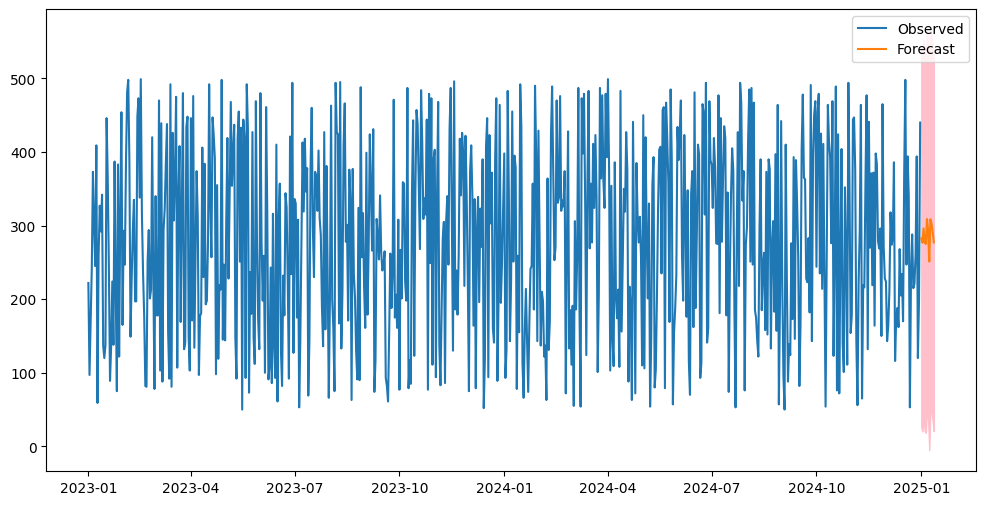

In [12]:
sarima_forecast = sarima_results.get_forecast(steps=12)
sarima_confidence_intervals = sarima_forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(data['Sales'], label='Observed')
plt.plot(sarima_forecast.predicted_mean, label='Forecast')
plt.fill_between(sarima_confidence_intervals.index,
                 sarima_confidence_intervals.iloc[:, 0],
                 sarima_confidence_intervals.iloc[:, 1], color='pink')
plt.legend()
plt.show()
